In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

In [2]:
house_dataFrame=pd.read_csv('data.csv')

In [3]:
house_dataFrame.head() #we see top five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
house_dataFrame.info() #show information about all data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     505 non-null    float64
 1    ZN       505 non-null    float64
 2    INDUS    505 non-null    float64
 3    CHAS     505 non-null    int64  
 4    NOX      505 non-null    float64
 5    RM       505 non-null    float64
 6   AGE       505 non-null    float64
 7    DIS      505 non-null    float64
 8    RAD      505 non-null    int64  
 9   TAX       505 non-null    int64  
 10  PTRATIO   505 non-null    float64
 11   B        505 non-null    float64
 12  LSTAT     505 non-null    float64
 13  MEDV      505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
house_dataFrame['TAX'].value_counts() 

666    132
307     40
403     30
437     15
304     14
      ... 
255      1
422      1
244      1
198      1
351      1
Name: TAX, Length: 66, dtype: int64

In [6]:
house_dataFrame.describe() #show average  minimum maximum valuse percentitle indicate the value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline #plot draw in this jupyter notebook

UsageError: unrecognized arguments: #plot draw in this jupyter notebook


In [ ]:
house_dataFrame.hist(bins=40,figsize=(20,35)) # plot histogram
plt.show()

In [ ]:
#Creating test set for checking 
def train_test_splt(data,test_ratio):
    np.random.seed(42) #for fixed shuffled values 
    shuffled=np.random.permutation(len(data))
    #print(shuffled)
    set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:set_size] #for first some test data set
    train_indices=shuffled[set_size:] #for some last test data set
    return data.iloc[train_indices],data.iloc[test_indices]

# For training and test Splitting

In [ ]:
train_data_set, test_data_set=train_test_splt(house_dataFrame,0.2)  #404 for training and 101 for testing
print(f" Rows in train data set :{len(train_data_set)} \n Row in test data set :{len(test_data_set)} \n")

# After their this data is from sklearn

In [ ]:
train_data_set, test_data_set=train_test_split(house_dataFrame,test_size=0.2,random_state=42)  #404 for training and 101 for testing
print(f" Rows in train data set :{len(train_data_set)} \n Row in test data set :{len(test_data_set)} \n")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house_dataFrame,house_dataFrame[' CHAS']):
    strat_train=house_dataFrame.loc[train_index] #loc is function of pandas
    strat_test=house_dataFrame.loc[test_index]

In [ ]:
strat_train

In [ ]:
strat_train[' CHAS'].value_counts()

# Correlations concepts

In [ ]:
correlaion_matric=house_dataFrame.corr()

In [ ]:
#correlaion_matric[' MEDV'].sort_values(ascending=False)

array([[<AxesSubplot:xlabel=' CHAS', ylabel=' CHAS'>,
        <AxesSubplot:xlabel=' RM', ylabel=' CHAS'>],
       [<AxesSubplot:xlabel=' CHAS', ylabel=' RM'>,
        <AxesSubplot:xlabel=' RM', ylabel=' RM'>]], dtype=object)

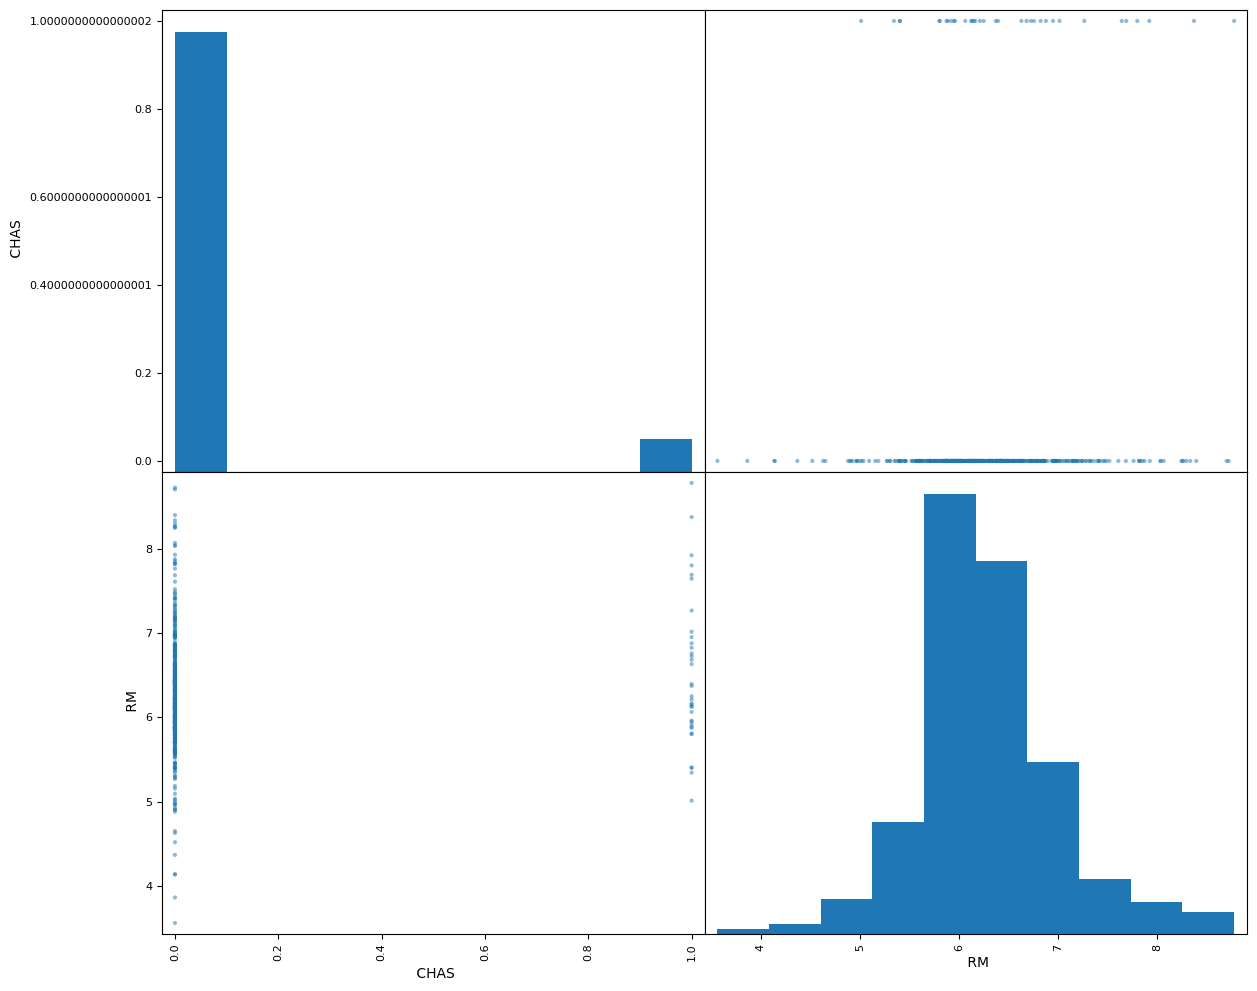

In [16]:
att=[' CHAS',' RM']
scatter_matrix(house_dataFrame[att],figsize=(14,12))

<AxesSubplot:xlabel=' CHAS', ylabel=' RM'>

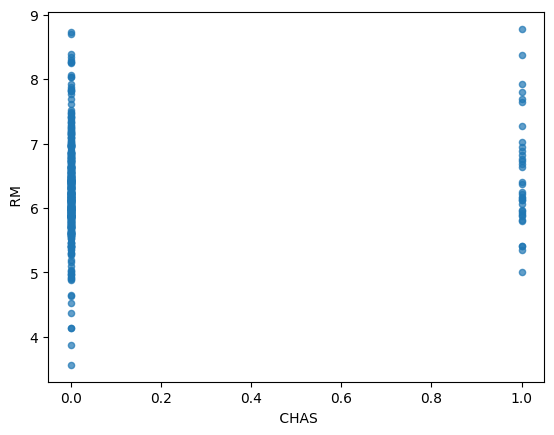

In [17]:
house_dataFrame.plot(kind="scatter",x=" CHAS",y=" RM",alpha=0.7)

In [19]:
house_dataFrame['TAXRM']=house_dataFrame['TAX']/house_dataFrame[' RM']

In [20]:
house_dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,34.525661


array([[<AxesSubplot:xlabel='TAXRM', ylabel='TAXRM'>]], dtype=object)

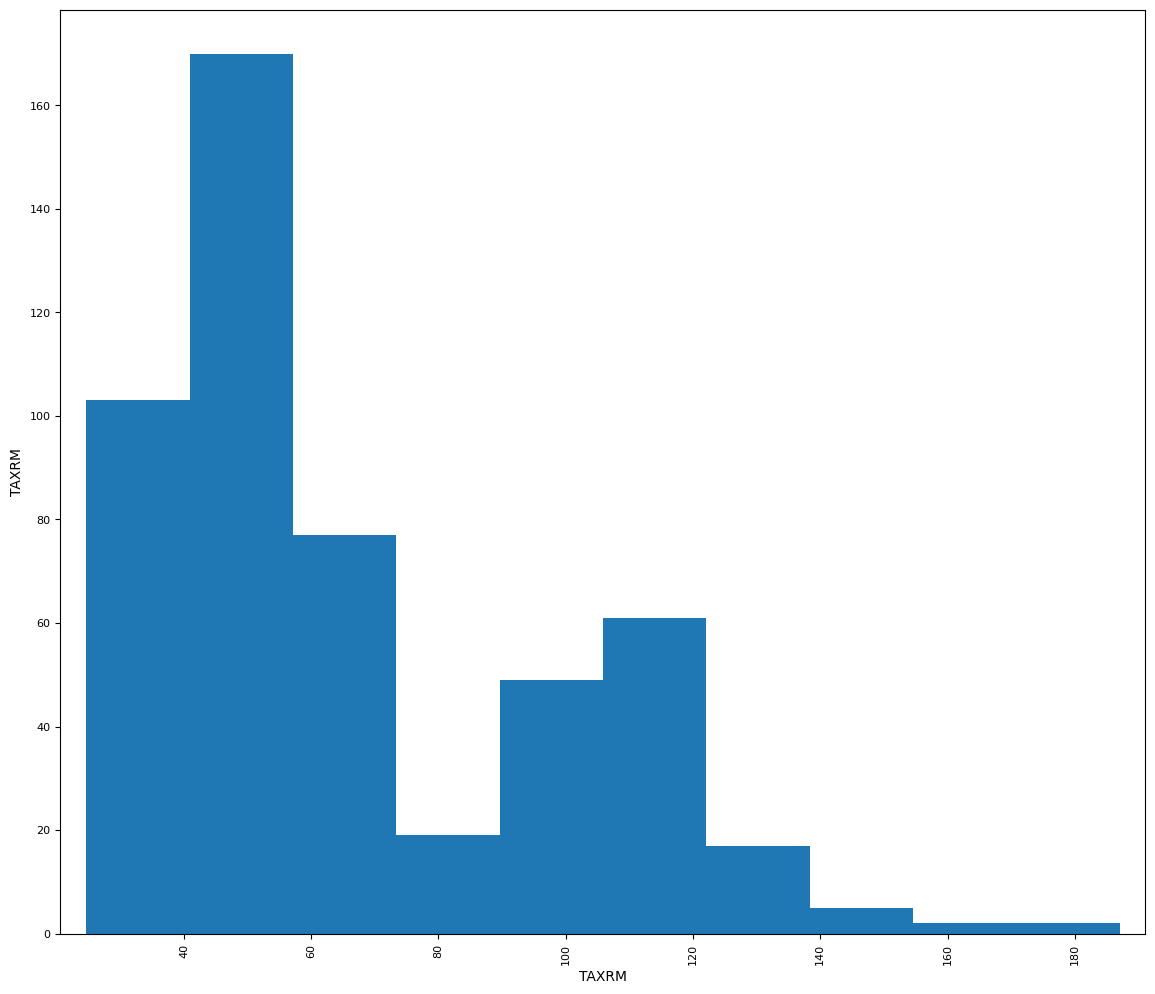

In [21]:
att=['TAXRM']
scatter_matrix(house_dataFrame[att],figsize=(14,12))

In [26]:
house_dataFrame.drop(' RM',axis=1).shape
# no RM colomn

(505, 14)

In [31]:
house_dataFrame.dropna(subset=[' RM']).shape
#housing dataframe unchanged

(505, 15)

In [36]:
median=house_dataFrame.[" RM"].median()

SyntaxError: invalid syntax (3243846598.py, line 1)

In [37]:
house_dataFrame[' RM'].fillna(median)

NameError: name 'median' is not defined

In [43]:
imputer=SimpleImputer(strategy="median")
imputer.fit(house_dataFrame)
imputer.statistics_

array([2.59150000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.77000000e+01, 3.19920000e+00,
       5.00000000e+00, 3.30000000e+02, 1.91000000e+01, 3.91430000e+02,
       1.13800000e+01, 2.12000000e+01, 5.36057273e+01])